In [42]:
# Importar librerías
import os
from keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt

# para manejo de archivos
import glob
from google.colab import files
import os
from os import path

In [43]:
# Crear carpetas donde se colocarán las imagenes a clasificar y los modelos (h5)
if path.exists('/content/clasifica') == False:
  os.makedirs('/content/clasifica')

if path.exists('/content/modelos') == False:
  os.makedirs('/content/modelos')

carpeta = "/content/clasifica"
modelos = "/content/modelos"

tamanio = 100

In [44]:
# Función que carga las imágenes de una lista de imágenes
def cargaImagenes(lista=[]):
    cargadas = []
    for s in lista:
        img = cv2.imread(s)    # Leer imagen
        img = cv2.resize(img, (tamanio, tamanio))    # Estandarizar tamaño 100 x 100 px
        img = cv2.cvtColor(img, (3))      # tener una imagen RGB
        cargadas.append(img)    # Agregar la imagen al arreglo de imágenes

    cargadas = np.array(cargadas) / 255.0    #Normalizar
    return cargadas

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

#          Cargar imágenes a clasificar y modelos en las carpetas

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

In [45]:
# Encontrar y listar imagenes por clasificar
clasifica=[]

for name in glob.glob(carpeta + '/*'):
    clasifica.append(name)

print("Lista de imagenes por clasificar: ")
print(clasifica)    

Lista de imagenes por clasificar: 
['/content/clasifica/4002.png', '/content/clasifica/7007.png', '/content/clasifica/3008.png', '/content/clasifica/7003.png', '/content/clasifica/7008.png', '/content/clasifica/4009.png', '/content/clasifica/5001.png', '/content/clasifica/6002.png', '/content/clasifica/5004.png', '/content/clasifica/1001.png', '/content/clasifica/5002.png', '/content/clasifica/5006.png', '/content/clasifica/7001.png', '/content/clasifica/3003.png', '/content/clasifica/7002.png', '/content/clasifica/7004.png', '/content/clasifica/4003.png', '/content/clasifica/1003.png', '/content/clasifica/4005.png', '/content/clasifica/7006.png', '/content/clasifica/2001.png', '/content/clasifica/6001.png', '/content/clasifica/4007.png', '/content/clasifica/4006.png', '/content/clasifica/1002.png', '/content/clasifica/4001.png', '/content/clasifica/4011.png', '/content/clasifica/7009.png', '/content/clasifica/3004.png', '/content/clasifica/5005.png', '/content/clasifica/3001.png', '/c

In [46]:
# Cargar archivos modelos h5 

# Modelos que harían que se detuviera el proceso
# 1. Determinar si hay pieza dental
model_faltante = load_model(modelos + "/dienteVSfaltante.h5")
# 2. Determinar si es sano el diente
model_sano = load_model(modelos + "/sanoVSenfermo.h5")

# Modelos a probar en caso de que los primeros no hagan detener el proceso
# 3. Determinar alguna patología dental
model_erosion = load_model(modelos + "/erosionVScompleto.h5")
model_caries = load_model(modelos + "/cariesVSnoCaries.h5")
model_sarro = load_model(modelos + "/sarroVSlimpio.h5")

In [47]:
# Cargar las imagenes contenidas en la carpeta
imagenes = []
imagenes = cargaImagenes(clasifica)

print("Total de imágenes encontradas en carpeta: ")
print(len(imagenes))

Total de imágenes encontradas en carpeta: 
46


In [48]:
# Para determinar si es faltante
#esFaltante = model_faltante.predict(imagenes)

esFaltante = []
redondeo = np.argmax(model_faltante.predict(imagenes), axis=1)
for r in redondeo:
  if (r == 0):
    esFaltante.append("NO")
  if (r == 1):
    esFaltante.append("SI")

print(esFaltante)  

['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO']


In [49]:
# Para determinar si es sano
modelo = model_sano.predict(imagenes)  # hacer la prediccion usando el modelo de sano

esSano=[]
for d in modelo:   
  #print(d)      
  if (d <= 0.5):     
    esSano.append("SI")    ## es sano
  if (d > 0.5):
    esSano.append("NO")    ## no es sano

print(esSano)  

['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO']


In [50]:
# Para determinar si es erosion
modelo = model_erosion.predict(imagenes)  # hacer la prediccion usando el modelo de erosion

esErosion=[]
for d in modelo:   
  #print(d)      
  if (d <= 0.5):     
    esErosion.append("SI")    ## es erosion
  if (d > 0.5):
    esErosion.append("NO")    ## no es erosion

print(esErosion) 

['NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO']


In [51]:
# Para determinar si es caries
modelo = model_caries.predict(imagenes)  # hacer la prediccion usando el modelo de caries

esCaries=[]
for d in modelo:   
  #print(d)      
  if (d <= 0.5):     
    esCaries.append("SI")    ## es caries
  if (d > 0.5):
    esCaries.append("NO")    ## no es caries

print(esCaries) 

['SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'SI', 'SI', 'SI', 'NO', 'SI']


In [52]:
# Para determinar si es sarro
modelo = model_sarro.predict(imagenes)  # hacer la prediccion usando el modelo de sarro

esSarro=[]
for d in modelo:   
  #print(d)      
  if (d <= 0.5):     
    esSarro.append("SI")    ## es sarro
  if (d > 0.5):
    esSarro.append("NO")    ## no es sarro

print(esSarro) 

['NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI', 'NO', 'NO', 'SI', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'SI', 'SI']


In [53]:
etiquetas=[]


for i in range(len(imagenes)):
  print("> Imagen procesada: " + clasifica[i])
  etiq = ""

  if (esFaltante[i] == "SI"):
    etiq = etiq + " Faltante"
  print("    es Faltante: " + esFaltante[i])

  if (esSano[i] == "SI"):
    etiq = etiq + " Sano"
  print("    es Sano:     " + esSano[i])

  if (esErosion[i] == "SI"):
    etiq = etiq + " Erosion"
  print("    es Erosion:  " + esErosion[i])

  if (esCaries[i] == "SI"):
    etiq = etiq + " Caries"
  print("    es Caries:   " + esCaries[i])

  if (esSarro[i] == "SI"):
    etiq = etiq + " Sarro"
  print("    es Sarro:    " + esSarro[i])

  etiquetas.append(etiq)

> Imagen procesada: /content/clasifica/4002.png
    es Faltante: NO
    es Sano:     NO
    es Erosion:  NO
    es Caries:   SI
    es Sarro:    NO
> Imagen procesada: /content/clasifica/7007.png
    es Faltante: NO
    es Sano:     NO
    es Erosion:  NO
    es Caries:   SI
    es Sarro:    SI
> Imagen procesada: /content/clasifica/3008.png
    es Faltante: NO
    es Sano:     NO
    es Erosion:  NO
    es Caries:   SI
    es Sarro:    NO
> Imagen procesada: /content/clasifica/7003.png
    es Faltante: NO
    es Sano:     NO
    es Erosion:  NO
    es Caries:   SI
    es Sarro:    NO
> Imagen procesada: /content/clasifica/7008.png
    es Faltante: NO
    es Sano:     NO
    es Erosion:  SI
    es Caries:   SI
    es Sarro:    NO
> Imagen procesada: /content/clasifica/4009.png
    es Faltante: NO
    es Sano:     NO
    es Erosion:  NO
    es Caries:   SI
    es Sarro:    SI
> Imagen procesada: /content/clasifica/5001.png
    es Faltante: NO
    es Sano:     NO
    es Erosion:  NO
    

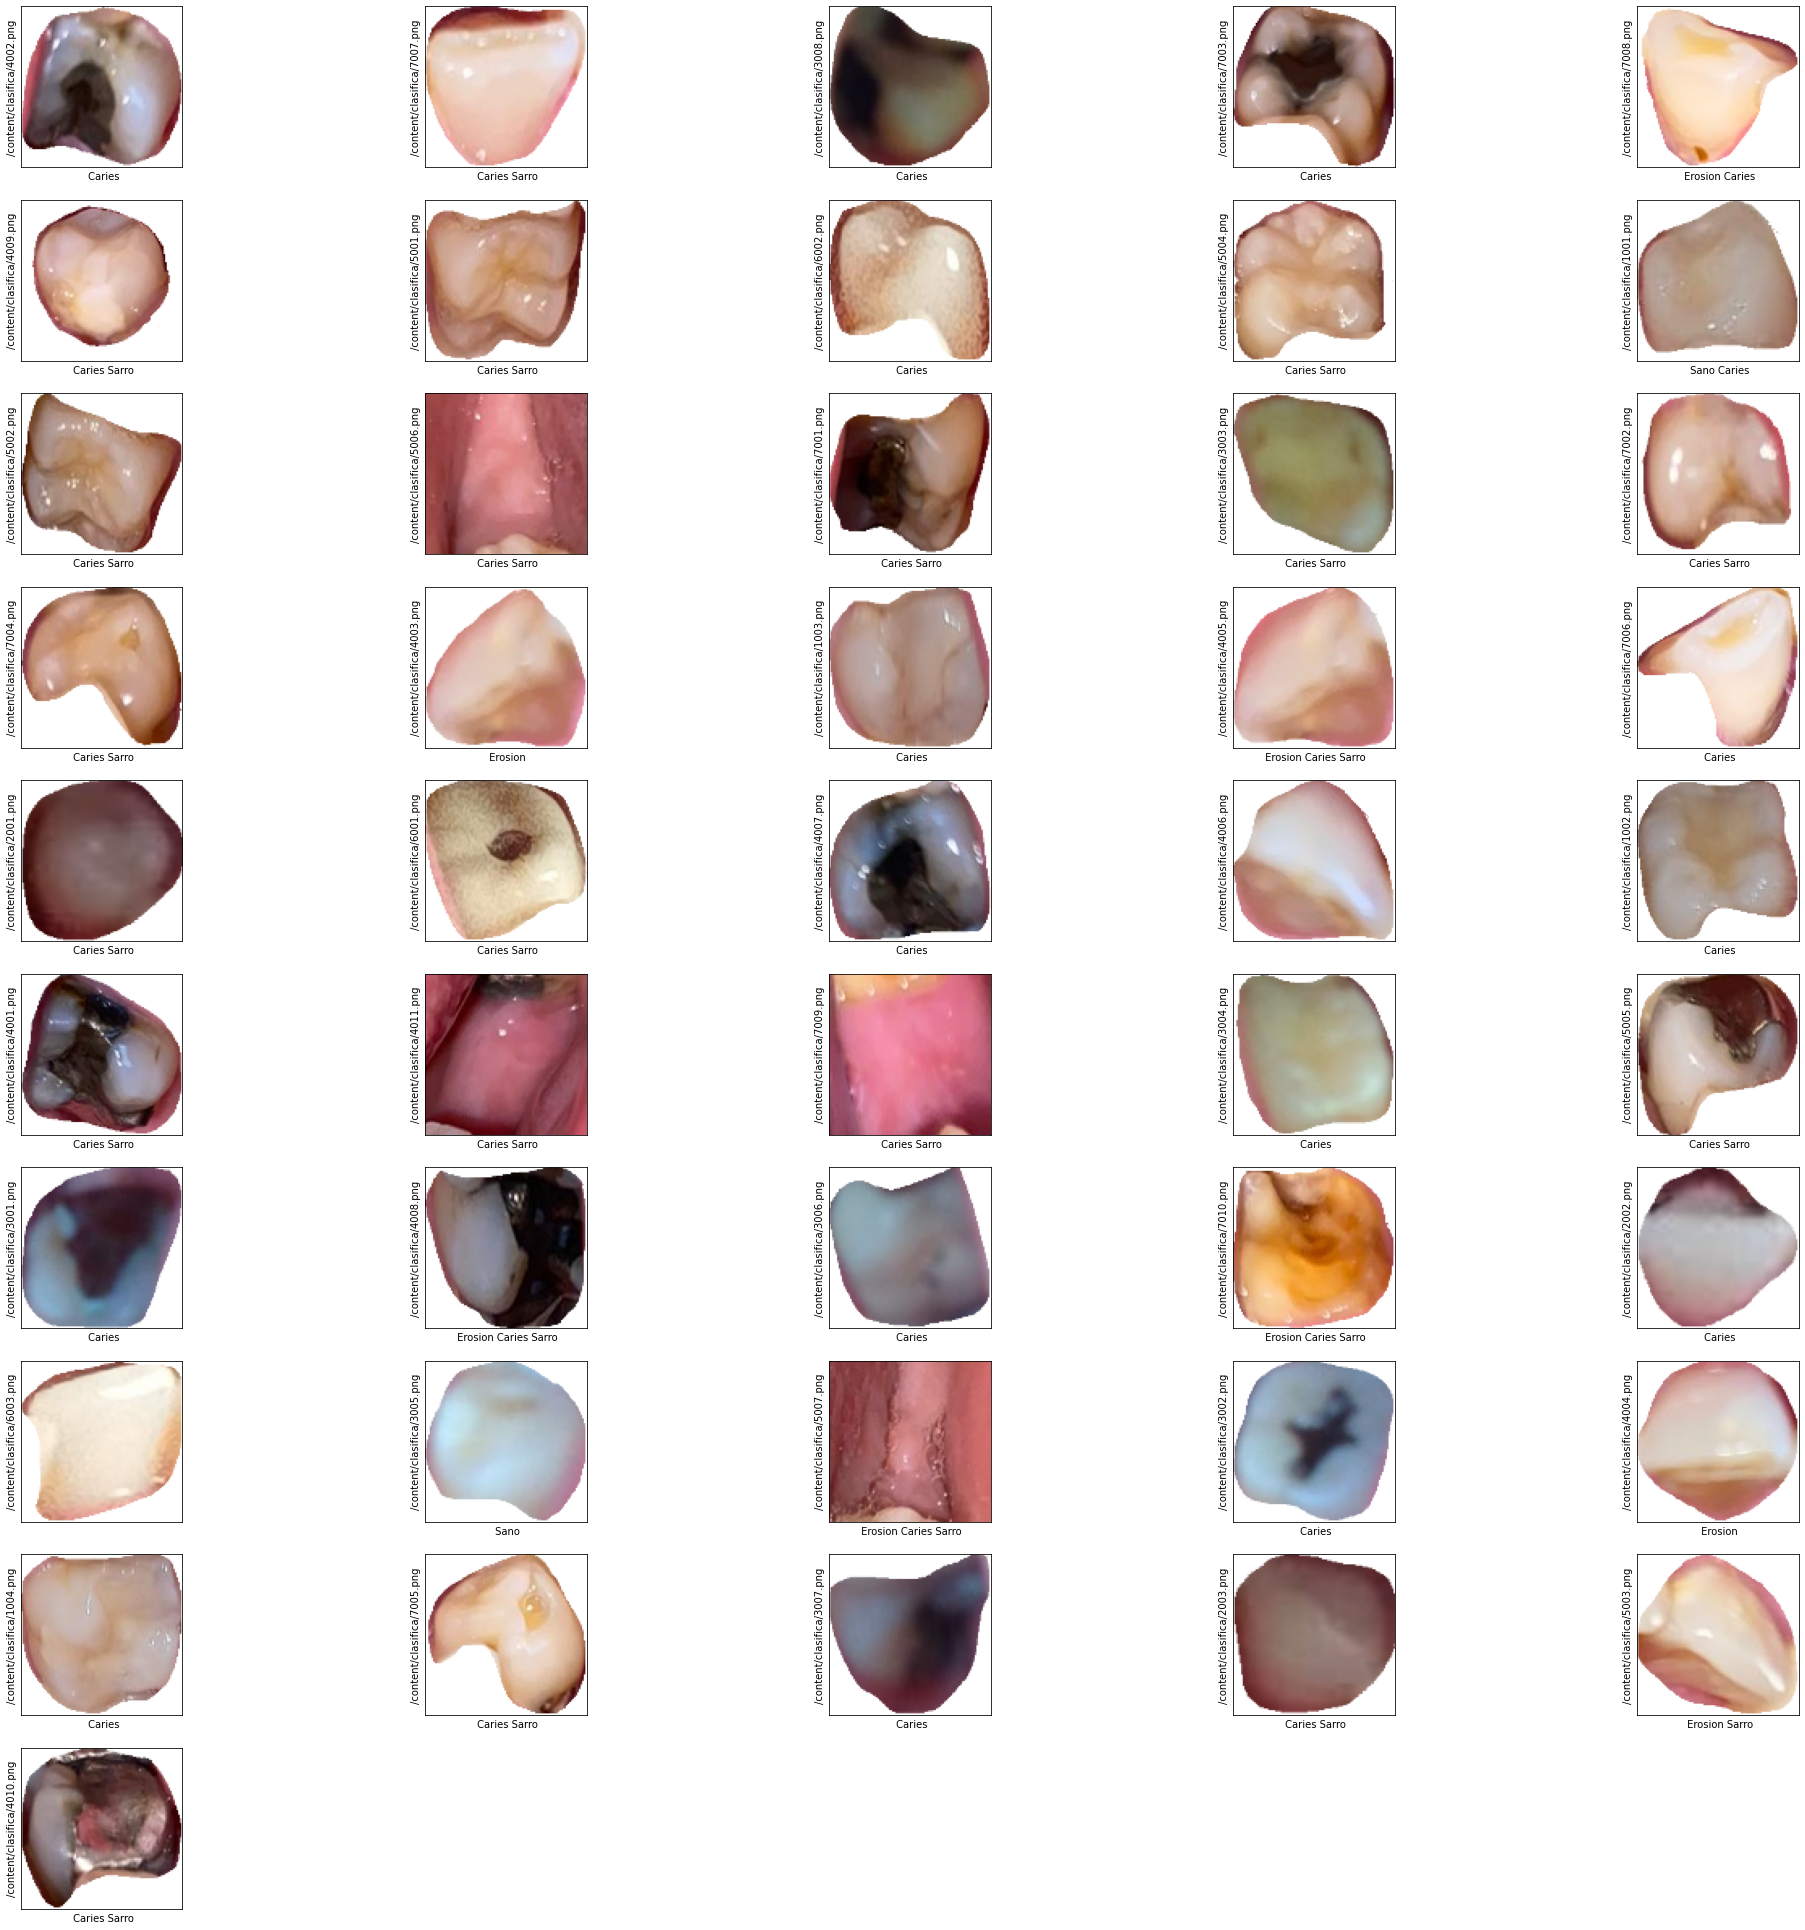

In [54]:
# Imprimir imagen y etiquetas
plt.figure(figsize=(35, 35))
for i in range(len(imagenes)):
  plt.subplot(10, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.ylabel(clasifica[i])
  plt.xlabel(etiquetas[i])
  plt.imshow(imagenes[i]) 